In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_original = pd.read_csv('../data/TBI PUD 10-08-2013.csv')

# Data Cleaning

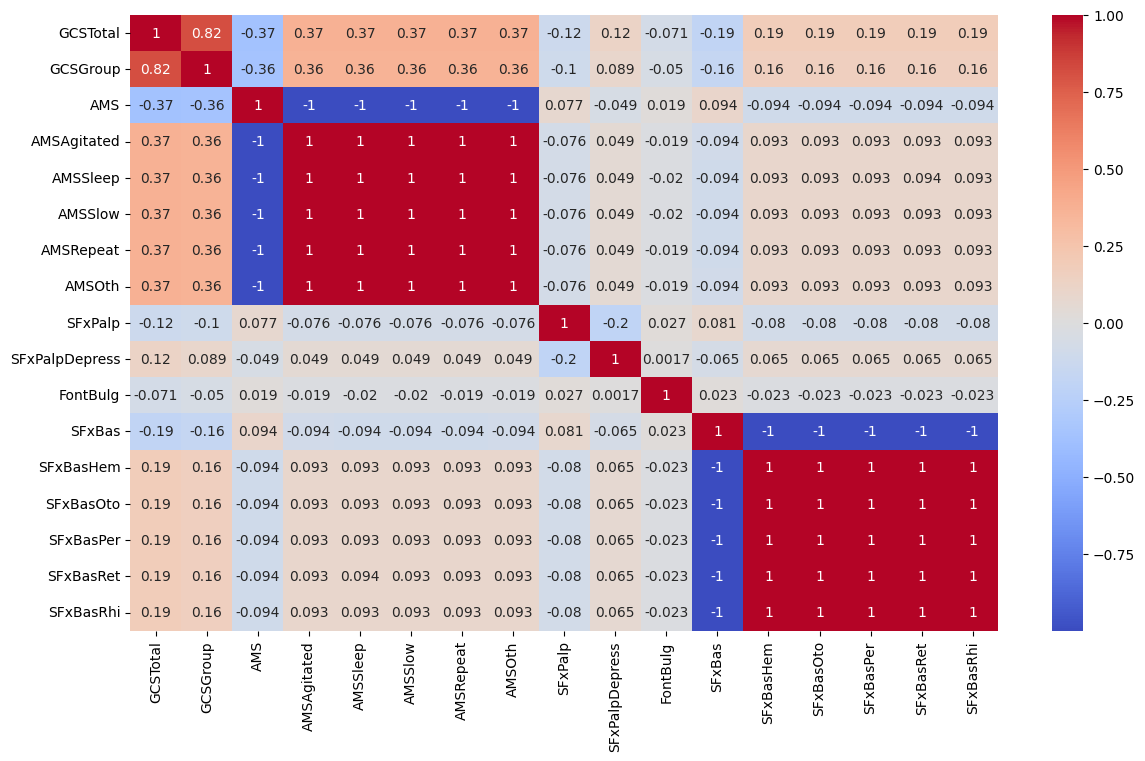

In [6]:
columns = ['GCSTotal', 'GCSGroup',
           'AMS', 'AMSAgitated', 'AMSSleep', 'AMSSlow', 'AMSRepeat', 'AMSOth',
           'SFxPalp', 'SFxPalpDepress', 'FontBulg',
           'SFxBas', 'SFxBasHem', 'SFxBasOto', 'SFxBasPer', 'SFxBasRet', 'SFxBasRhi']
plt.figure(figsize=(14, 8))
sns.heatmap(data_original[columns].corr(), annot=True, cmap='coolwarm')
plt.savefig("corr1.svg")
plt.show()

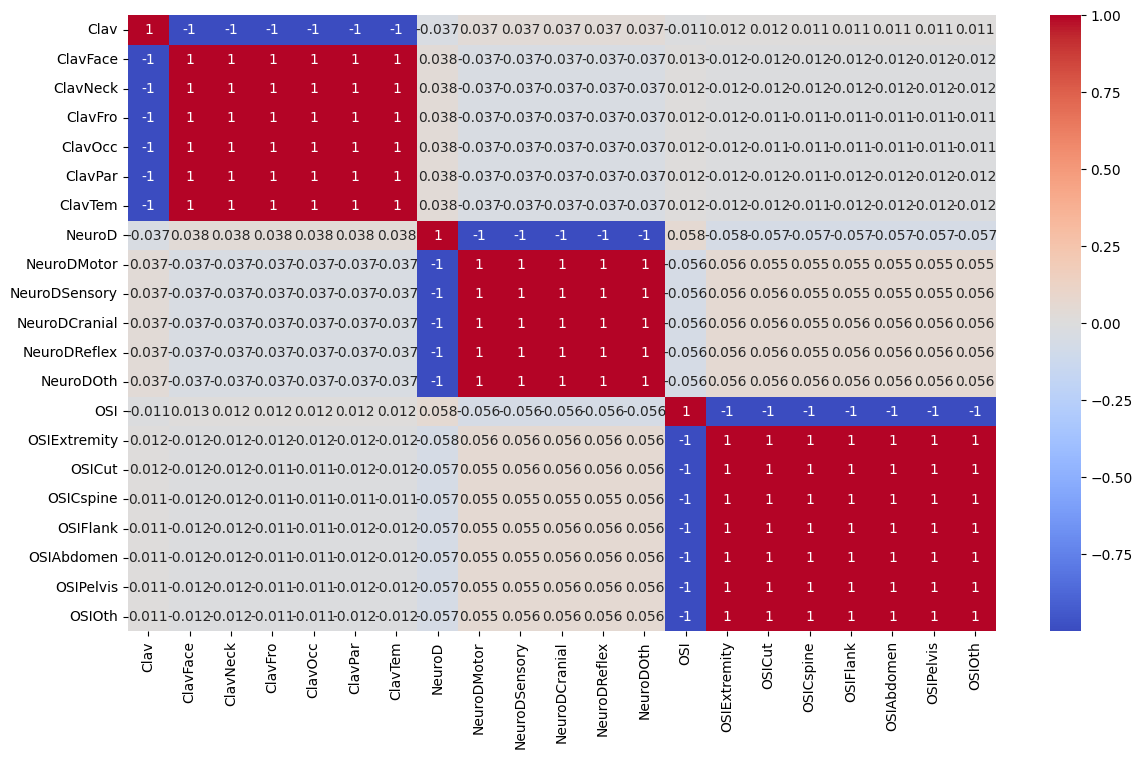

In [7]:
columns = ['Clav', 'ClavFace', 'ClavNeck', 'ClavFro', 'ClavOcc', 'ClavPar', 'ClavTem',
           'NeuroD', 'NeuroDMotor', 'NeuroDSensory', 'NeuroDCranial', 'NeuroDReflex', 'NeuroDOth',
           'OSI', 'OSIExtremity', 'OSICut', 'OSICspine', 'OSIFlank', 'OSIAbdomen', 'OSIPelvis', 'OSIOth']
plt.figure(figsize=(14, 8))
sns.heatmap(data_original[columns].corr(), annot=True, cmap='coolwarm')
plt.savefig("corr2.svg")
plt.show()

In [3]:
import data_cleaning

In [4]:
data = data_cleaning.exclude_rows(data_original)

In [5]:
data = data_cleaning.drop_unrelated_features(data)
data = data_cleaning.drop_repetitive_features(data)

In [7]:
print(data.isnull().sum())

PatNum                    0
InjuryMech              283
High_impact_InjSev      313
Amnesia_verb           2072
LOCSeparate            1719
LocLen                 2283
Seiz                    720
SeizOccur                50
SeizLen                  74
ActNorm                3006
HA_verb                 445
HASeverity             1009
HAStart                1313
Vomit                   300
VomitNbr                253
VomitStart              370
VomitLast               910
Dizzy                 15116
GCSTotal                  0
AMS                     316
SFxPalp                 101
SFxPalpDepress           31
FontBulg                159
SFxBas                  421
Hema                    292
HemaLoc                 201
HemaSize                708
Clav                    129
NeuroD                  360
OSI                     182
Drugs                  1776
AgeinYears                0
AgeTwoPlus                0
Observed               2299
PosIntFinal               0
dtype: int64


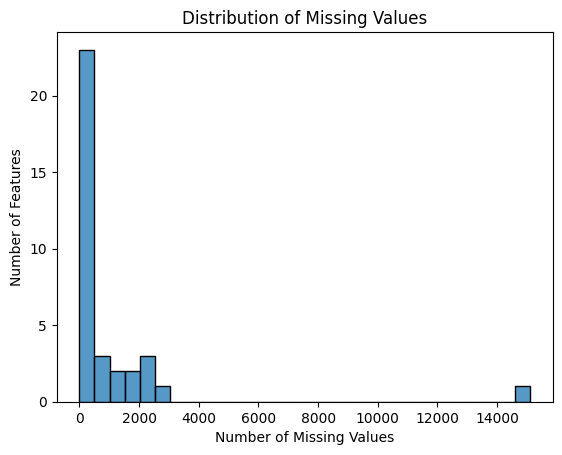

In [6]:
missing_counts = data.isnull().sum()
sns.histplot(missing_counts, bins=30)
plt.xlabel("Number of Missing Values")
plt.ylabel("Number of Features")
plt.title("Distribution of Missing Values")
plt.savefig("missings.svg")
plt.show()

In [6]:
data = data_cleaning.replace_na(data)

# Data Exploration


In [17]:
from ydata_profiling import ProfileReport

ProfileReport(data, explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
PosIntFinal_summary = data['PosIntFinal'].value_counts().to_frame(name='Count')
PosIntFinal_summary['Percentage'] = (PosIntFinal_summary['Count'] / PosIntFinal_summary['Count'].sum()) * 100
PosIntFinal_summary

Count  Percentage
PosIntFinal                   
0.0          42036   99.113458
1.0            376    0.886542

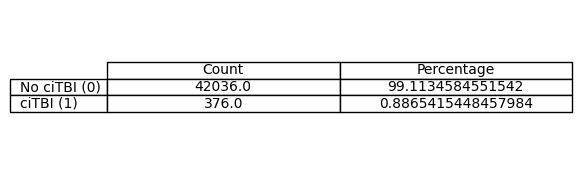

In [49]:
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis("tight")
ax.axis("off")

PosIntFinal_summary.index = ["No ciTBI (0)", "ciTBI (1)"]

# Create the table
table = ax.table(cellText=PosIntFinal_summary.values,
                 colLabels=PosIntFinal_summary.columns,
                 rowLabels=PosIntFinal_summary.index,
                 cellLoc="center", loc="center")
plt.savefig("imbalance.svg")
plt.show()

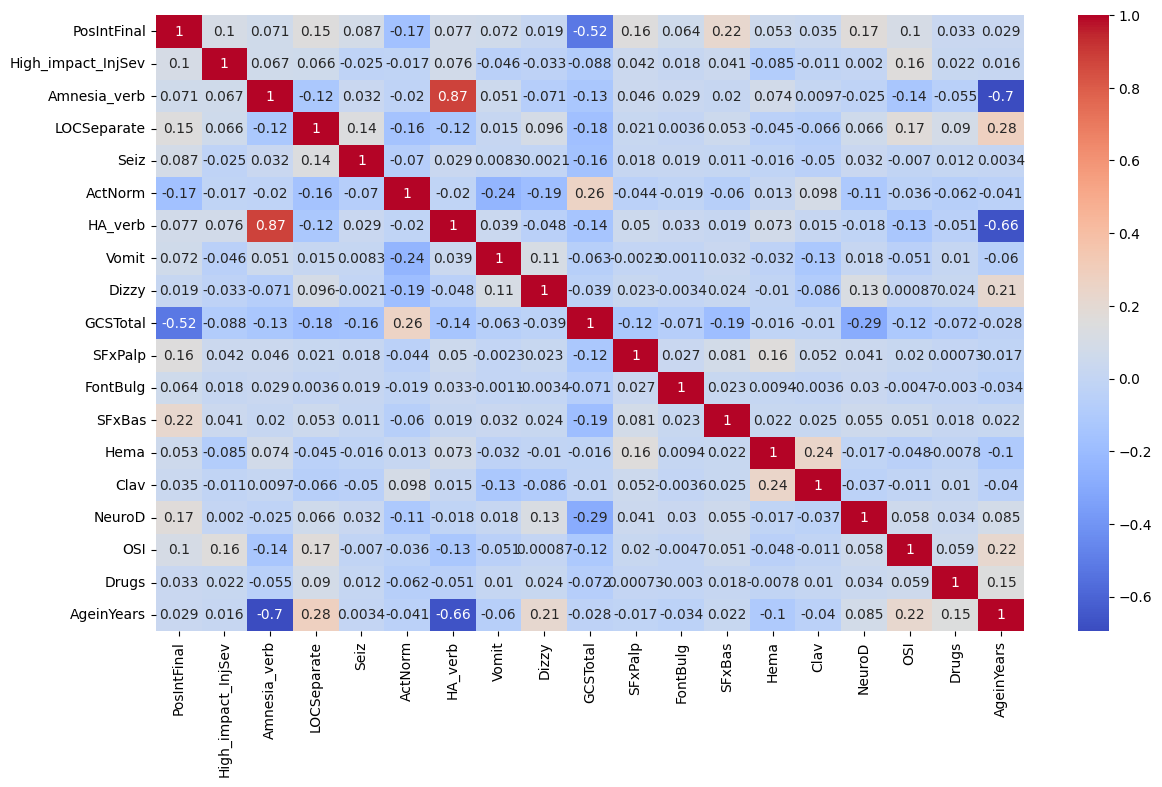

In [36]:
columns = ['PosIntFinal', 'High_impact_InjSev', 'Amnesia_verb', 'LOCSeparate', 'Seiz',
           'ActNorm', 'HA_verb', 'Vomit', 'Dizzy', 'GCSTotal', 'SFxPalp', 'FontBulg',
           'SFxBas', 'Hema', 'Clav', 'NeuroD', 'OSI', 'Drugs', 'AgeinYears']
plt.figure(figsize=(14, 8))
sns.heatmap(data_original[columns].corr(), annot=True, cmap='coolwarm')
plt.savefig("corr3.svg")
plt.show()

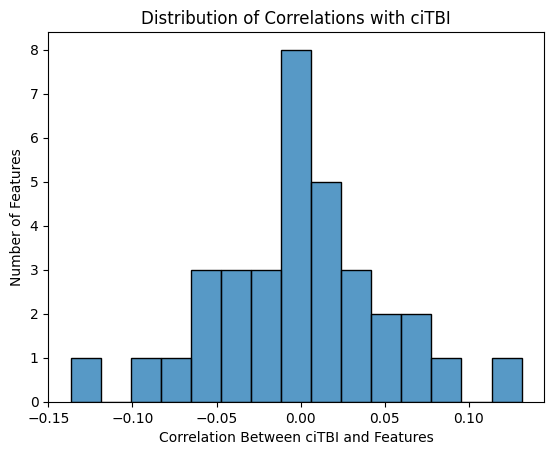

In [7]:
corrs = data.corr()['PosIntFinal'].drop('PosIntFinal')

sns.histplot(corrs, bins=15)
plt.xlabel("Correlation Between ciTBI and Features")
plt.ylabel("Number of Features")
plt.title("Distribution of Correlations with ciTBI")
plt.savefig("corr_ciTBI.svg")
plt.show()

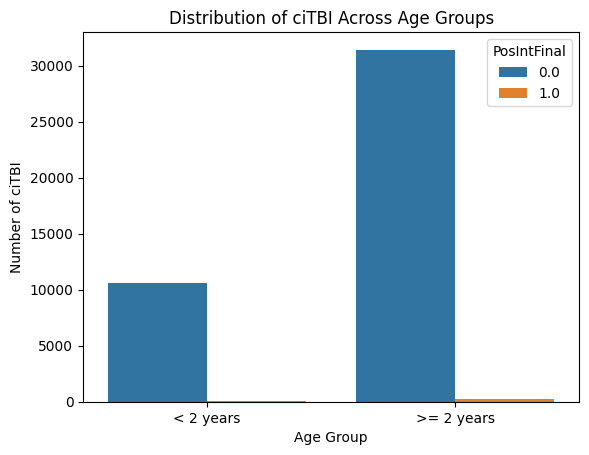

In [9]:
sns.countplot(x='AgeTwoPlus', hue='PosIntFinal', data=data)
plt.xlabel('Age Group')
plt.ylabel('Number of ciTBI')
plt.title("Distribution of ciTBI Across Age Groups")
plt.xticks([0, 1], ['< 2 years', '>= 2 years'])
plt.savefig("ciTBI_age.svg")
plt.show()

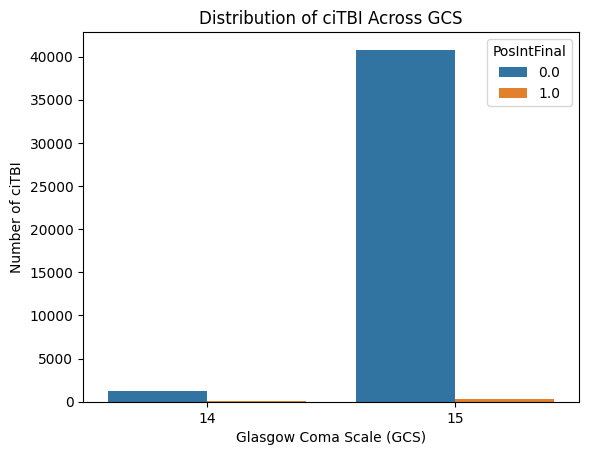

In [35]:
sns.countplot(x='GCSTotal', hue='PosIntFinal', data=data)
plt.xlabel('Glasgow Coma Scale (GCS)')
plt.ylabel('Number of ciTBI')
plt.title("Distribution of ciTBI Across GCS")
plt.xticks([0, 1], ['14', '15'])
plt.savefig("ciTBI_gcs.svg")
plt.show()

In [10]:
data_younger = data[data['AgeTwoPlus'] == 1]
data_older = data[data['AgeTwoPlus'] == 2]

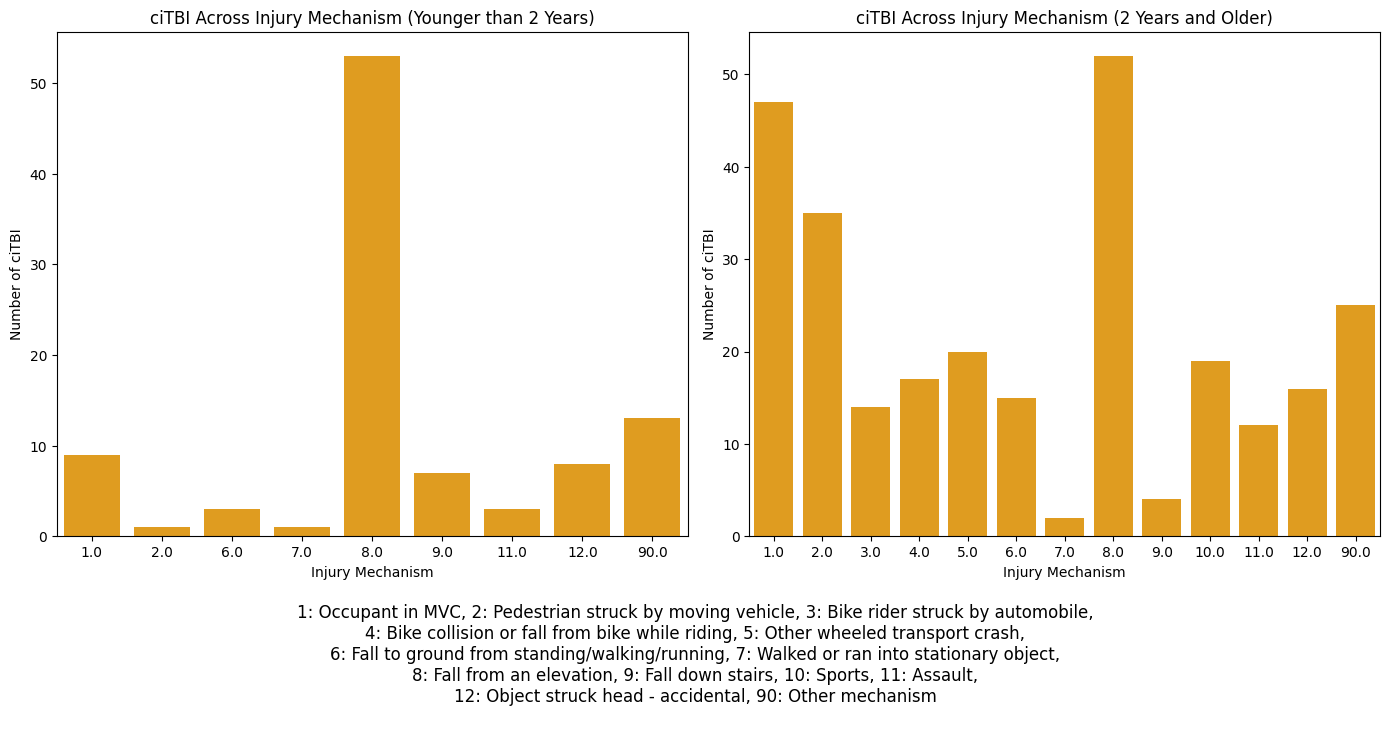

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

legends = """
1: Occupant in MVC, 2: Pedestrian struck by moving vehicle, 3: Bike rider struck by automobile,
4: Bike collision or fall from bike while riding, 5: Other wheeled transport crash,
6: Fall to ground from standing/walking/running, 7: Walked or ran into stationary object,
8: Fall from an elevation, 9: Fall down stairs, 10: Sports, 11: Assault,
12: Object struck head - accidental, 90: Other mechanism
"""

sns.countplot(x='InjuryMech', color='orange', data=data_younger[data_younger['PosIntFinal'] == 1], ax=ax[0])
ax[0].set_xlabel('Injury Mechanism')
ax[0].set_ylabel('Number of ciTBI')
ax[0].set_title("ciTBI Across Injury Mechanism (Younger than 2 Years)")

sns.countplot(x='InjuryMech', color='orange', data=data_older[data_older['PosIntFinal'] == 1], ax=ax[1])
ax[1].set_xlabel('Injury Mechanism')
ax[1].set_ylabel('Number of ciTBI')
ax[1].set_title("ciTBI Across Injury Mechanism (2 Years and Older)")

plt.figtext(0.5, -0.1, legends, ha='center', va='center',
            wrap=True, fontsize=12)
plt.tight_layout()
plt.savefig("ciTBI_injury.svg")
plt.show()

# Stability Check

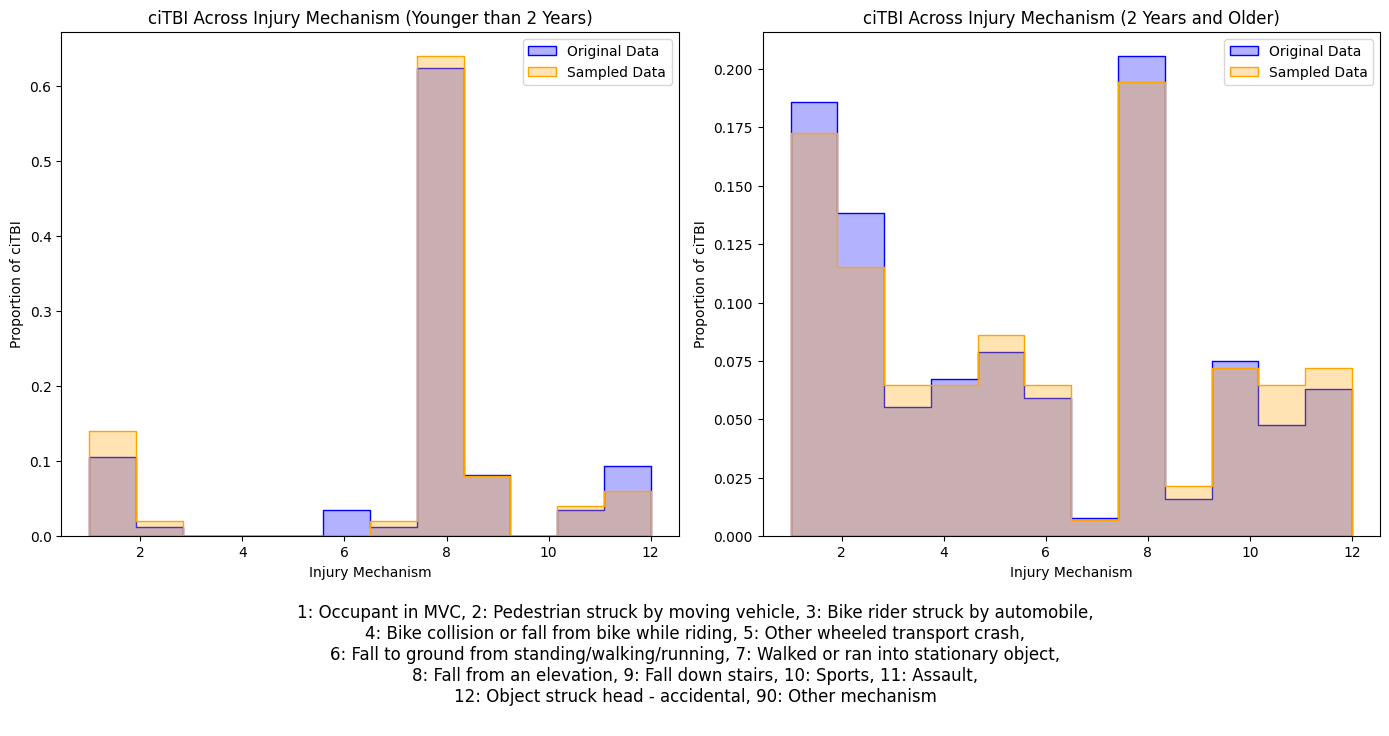

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
original_color = "blue"
sampled_color = "orange"

sampled_data_younger = data_younger.sample(frac=0.6, random_state=42)
sampled_data_older = data_older.sample(frac=0.6, random_state=42)

data_younger_filtered = data_younger[data_younger['InjuryMech'] != 90]
sampled_data_younger_filtered = sampled_data_younger[sampled_data_younger['InjuryMech'] != 90]
data_older_filtered = data_older[data_older['InjuryMech'] != 90]
sampled_data_older_filtered = sampled_data_older[sampled_data_older['InjuryMech'] != 90]

sns.histplot(x='InjuryMech',
             data=data_younger_filtered[data_younger_filtered['PosIntFinal'] == 1],
             bins=12, ax=ax[0], color=original_color, alpha=0.3,
             label="Original Data", element="step", stat="probability")
sns.histplot(x='InjuryMech',
             data=sampled_data_younger_filtered[sampled_data_younger_filtered['PosIntFinal'] == 1],
             bins=12, ax=ax[0], color=sampled_color, alpha=0.3,
             label="Sampled Data", element="step", stat="probability")

ax[0].set_xlabel('Injury Mechanism')
ax[0].set_ylabel('Proportion of ciTBI')
ax[0].set_title("ciTBI Across Injury Mechanism (Younger than 2 Years)")
ax[0].legend()


sns.histplot(x='InjuryMech',
             data=data_older_filtered[data_older_filtered['PosIntFinal'] == 1],
             bins=12, ax=ax[1], color=original_color, alpha=0.3,
             label="Original Data", element="step", stat="probability")
sns.histplot(x='InjuryMech',
             data=sampled_data_older_filtered[sampled_data_older_filtered['PosIntFinal'] == 1],
             bins=12, ax=ax[1], color=sampled_color, alpha=0.3,
             label="Sampled Data", element="step", stat="probability")

ax[1].set_xlabel('Injury Mechanism')
ax[1].set_ylabel('Proportion of ciTBI')
ax[1].set_title("ciTBI Across Injury Mechanism (2 Years and Older)")
ax[1].legend()

plt.figtext(0.5, -0.1, legends, ha='center', va='center',
            wrap=True, fontsize=12)
plt.tight_layout()
plt.savefig("stability.svg")
plt.show()